In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import r2_score,mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings("ignore")

In [0]:
TRAIN_DATA_PATH = '/content/drive/Shared drives/CMPE-255/final_df.csv'
TEST_DATA_PATH =  '/content/drive/Shared drives/CMPE-255/fb_status_data.csv'
MODEL_PATH = '/content/drive/My Drive/Assignments/255/Project/Models/'

In [0]:
df_train = pd.read_csv(TRAIN_DATA_PATH)

In [0]:
df_test = pd.read_csv(TEST_DATA_PATH)

In [0]:
#creating train data and labels
X = df_train['status_update']
y = df_train.drop(['userid','status_update'],axis=1)

In [0]:
#creating train data and labels
X_test = df_test['STATUS']
drop_list = ['#AUTHID', 'STATUS', 'cEXT',
       'cNEU', 'cAGR', 'cCON', 'cOPN', 'DATE', 'NETWORKSIZE', 'BETWEENNESS',
       'NBETWEENNESS', 'DENSITY', 'BROKERAGE', 'NBROKERAGE', 'TRANSITIVITY']
y_test = df_test.drop(drop_list,axis=1)

In [0]:
#vectorize the training data
tfidf = TfidfVectorizer(stop_words='english',strip_accents='ascii')
X = tfidf.fit_transform(X.values.astype('U'))

In [0]:
traits = ['sOPN', 'sCON', 'sEXT', 'sAGR', 'sNEU']

Trait  O => r2_score:  0.62  mean_squared_error:  0.17
Dumped:  sOPN
Trait  C => r2_score:  0.56  mean_squared_error:  0.23
Dumped:  sCON
Trait  E => r2_score:  0.57  mean_squared_error:  0.22
Dumped:  sEXT
Trait  A => r2_score:  0.57  mean_squared_error:  0.19
Dumped:  sAGR
Trait  N => r2_score:  0.53  mean_squared_error:  0.29
Dumped:  sNEU

Overall R2 Score:  0.57  Overall MSE:  0.22


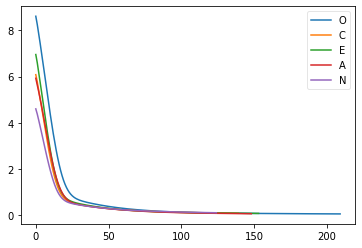

In [21]:
R2 = list()
MSE = list()
for trait in traits:

  mlp = MLPRegressor(learning_rate_init=0.0001,activation='relu',
                     solver='adam',alpha=0.0001,max_iter=1000,batch_size=1000,
                     early_stopping = True,learning_rate = 'adaptive')
  mlp.fit(X,y[trait])

  y_pred = mlp.predict(X)
  r2 = r2_score(y[trait],y_pred)
  mse = mean_squared_error(y[trait],y_pred)
  R2.append(r2)
  MSE.append(mse)

  print('Trait ', trait[1], '=> r2_score: ',np.around(r2,decimals=2),' mean_squared_error: ',np.around(mse,decimals=2))
  
  plt.plot(mlp.loss_curve_,label=trait[1])
  leg = plt.legend()
  leg.get_frame().set_alpha(0.5)

  with open(MODEL_PATH + trait + '_model_mlp.pkl', 'wb') as f:
    pickle.dump(mlp, f)
    print('Dumped: ', trait)

print('\nOverall R2 Score: ', np.around(np.mean(R2),decimals=2),' Overall MSE: ',np.around(np.mean(MSE),decimals=2))